# Allgerian Forest Fires-Logestic Regression

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#imporing data

In [3]:
data= pd.read_csv("G:\Downloads\Algerian_forest_fires_dataset_UPDATE (2).csv",header=1)

In [5]:
data.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

Attribution information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [6]:
data.shape

(246, 14)

In [7]:
#Dropping the unwanted Rows and Columns

In [9]:
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [10]:
#Shape of the dataset after dropping the rows

In [11]:
data.shape

(244, 14)

In [12]:
##Adding 'Region column' to Dataset

In [13]:
data.loc[:122,'region']='bejia'
data.loc[122:,'region']='Sidi-Bel-Abbes'

In [14]:
#Checking the columns of the Dataset

In [15]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [16]:
#Striping the spaces in the column titles

In [18]:
data.columns=[spaces.strip() for spaces in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [19]:
# stripping the data of below features as it has unwanted spaces
for feature in ['RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    data[feature]=data[feature].str.replace(" ","")

In [20]:
#Checking the unique datapoints of FWI feature
data['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

In [21]:
# we can see  str in the dataset,will be replacing it with mode
data[data['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [22]:
data['FWI'].mode()

0    0.4
Name: FWI, dtype: object

In [23]:
data.loc[165,'FWI']='0.4'

In [25]:
#checking for data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


all features are in categorical type

In [26]:
#checking the null values in the features
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

One null value present in the classes

In [27]:
# replacing the null values of classes features
data[data['Classes']=='nan'].index

Int64Index([], dtype='int64')

In [28]:
data.loc[165,'Classes']="fire"

In [30]:
data['Classes']=data["Classes"].str.replace('notfire','0')
data['Classes']=data["Classes"].str.replace('fire','1')

In [31]:
#Replacing the values of region feature with "0 and "1
data['region'].unique()

array(['bejia', 'Sidi-Bel-Abbes'], dtype=object)

In [32]:
data["region"]=data["region"].str.replace('bejia','0')
data["region"]=data["region"].str.replace('Sidi-Bel-Abbes','1')

In [33]:
#convertin g the datatype categorical to numerical
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [34]:
data.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

  Classes region  
0       0      0  
1       0      0  
2       0      0  
3       0      0  
4       0      0

In [38]:
data_convert={'day':int,'month':int,'year':int,'Temperature':int,'RH':int,'Ws':int,'Rain':float,'FFMC':float,'DMC':float,'DC':float,'ISI':float,'BUI':float,'FWI':float,'Classes':int,'region':int}

In [39]:
data=data.astype(data_convert)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.1 KB


In [40]:
#Creating a copy of dataframe from Original Dataframe
data1=data.copy()
data1.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

Statistical Analysis

In [41]:
data1.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288484    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619393    4.175318   14.204824   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.250000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI     Classes      region  
count  244.000000  244.000000  244.000000  
mean     7.008197    0.565574    0.500000  
std      7.437383    0.496700    0.501028  
min      0.000000    0.000000    0.000000  
25%      0.700000    0.000000    0.000000  
50%      4.200000    1.000000    0.500000  
75%     11.375000    1.000000    1.000000  
max     31.100000    1.000000    1.000000

In [42]:
data1.cov()

day         month  year  Temperature          RH  \
day          7.788167e+01  4.641920e-16   0.0     3.071308   -9.747689   
month        4.641920e-16  1.238683e+00   0.0    -0.238683   -0.627572   
year         0.000000e+00  0.000000e+00   0.0     0.000000    0.000000   
Temperature  3.071308e+00 -2.386831e-01   0.0    13.204817  -35.396782   
RH          -9.747689e+00 -6.275720e-01   0.0   -35.396782  221.539415   
Ws           1.165621e+00 -1.296296e-01   0.0    -2.840215    9.874739   
Rain        -1.980908e+00  7.860082e-02   0.0    -2.374270    6.635431   
FFMC         2.834676e+01  2.485597e-01   0.0    35.297598 -137.785533   
DMC          5.365433e+01  9.384774e-01   0.0    21.712423  -74.580245   
DC           2.218594e+02  6.766276e+00   0.0    64.113719 -156.174991   
ISI          6.548769e+00  2.866255e-01   0.0     9.218043  -42.920524   
BUI          6.483903e+01  1.356790e+00   0.0    23.512265  -73.700941   
FWI          2.303207e+01  6.962963e-01   0.0    15.102287  -63.152169   
Classes      8.845038e-01  1.234568e-02   0.0     0.935168   -3.216117   
region       2.924044e-17  0.000000e+00   0.0     0.497942   -3.030864   

                    Ws       Rain        FFMC         DMC           DC  \
day           1.165621  -1.980908   28.346758   53.654328   221.859379   
month        -0.129630   0.078601    0.248560    0.938477     6.766276   
year          0.000000   0.000000    0.000000    0.000000     0.000000   
Temperature  -2.840215  -2.374270   35.297598   21.712423    64.113719   
RH            9.874739   6.635431 -137.785533  -74.580245  -156.174991   
Ws            7.897102   0.956129   -6.577727   -0.043306    10.204060   
Rain          0.956129   3.997623  -15.595918   -7.135415   -28.259196   
FFMC         -6.577727 -15.595918  205.565939  106.820535   344.048788   
DMC          -0.043306  -7.135415  106.820535  152.968382   515.551947   
DC           10.204060 -28.259196  344.048788  515.551947  2267.606583   
ISI           0.178913  -2.897687   44.283138   34.831449    99.199508   
BUI           1.187799  -8.496825  120.090018  172.536341   637.129111   
FWI           0.606139  -4.800293   73.187426   80.480590   262.143165   
Classes      -0.092862  -0.376833    5.484349    3.588791    11.994976   
region       -0.248971  -0.041152    1.613992    1.184156    -1.944053   

                   ISI         BUI         FWI    Classes        region  
day           6.548769   64.839034   23.032065   0.884504  2.924044e-17  
month         0.286626    1.356790    0.696296   0.012346  0.000000e+00  
year          0.000000    0.000000    0.000000   0.000000  0.000000e+00  
Temperature   9.218043   23.512265   15.102287   0.935168  4.979424e-01  
RH          -42.920524  -73.700941  -63.152169  -3.216117 -3.030864e+00  
Ws            0.178913    1.187799    0.606139  -0.092862 -2.489712e-01  
Rain         -2.897687   -8.496825   -4.800293  -0.376833 -4.115226e-02  
FFMC         44.283138  120.090018   73.187426   5.484349  1.613992e+00  
DMC          34.831449  172.536341   80.480590   3.588791  1.184156e+00  
DC           99.199508  637.129111  262.143165  11.994976 -1.944053e+00  
ISI          17.433281   37.714477   28.198196   1.525363  5.615226e-01  
BUI          37.714477  201.777024   90.628767   4.119605  6.218107e-01  
FWI          28.198196   90.628767   55.314665   2.636497  7.181070e-01  
Classes       1.525363    4.119605    2.636497   0.246711  4.115226e-02  
region        0.561523    0.621811    0.718107   0.041152  2.510288e-01

In [44]:
data1.corr().T

day         month  year  Temperature        RH  \
day          1.000000e+00  2.232788e-17   NaN     0.095772 -0.074209   
month        2.232788e-17  1.000000e+00   NaN    -0.059017 -0.037884   
year                  NaN           NaN   NaN          NaN       NaN   
Temperature  9.577222e-02 -5.901677e-02   NaN     1.000000 -0.654443   
RH          -7.420934e-02 -3.788419e-02   NaN    -0.654443  1.000000   
Ws           4.700086e-02 -4.144673e-02   NaN    -0.278132  0.236084   
Rain        -1.122654e-01  3.532207e-02   NaN    -0.326786  0.222968   
FFMC         2.240321e-01  1.557668e-02   NaN     0.677491 -0.645658   
DMC          4.915710e-01  6.817778e-02   NaN     0.483105 -0.405133   
DC           5.279300e-01  1.276691e-01   NaN     0.370511 -0.220344   
ISI          1.777266e-01  6.168011e-02   NaN     0.607551 -0.690637   
BUI          5.172292e-01  8.582162e-02   NaN     0.455504 -0.348587   
FWI          3.509095e-01  8.411895e-02   NaN     0.558800 -0.570483   
Classes      2.017844e-01  2.233266e-02   NaN     0.518119 -0.435023   
region       4.662229e-16 -9.586232e-17   NaN     0.273496 -0.406424   

                   Ws      Rain      FFMC       DMC        DC       ISI  \
day          0.047001 -0.112265  0.224032  0.491571  0.527930  0.177727   
month       -0.041447  0.035322  0.015577  0.068178  0.127669  0.061680   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.278132 -0.326786  0.677491  0.483105  0.370511  0.607551   
RH           0.236084  0.222968 -0.645658 -0.405133 -0.220344 -0.690637   
Ws           1.000000  0.170169 -0.163255 -0.001246  0.076253  0.015248   
Rain         0.170169  1.000000 -0.544045 -0.288548 -0.296808 -0.347105   
FFMC        -0.163255 -0.544045  1.000000  0.602391  0.503919  0.739730   
DMC         -0.001246 -0.288548  0.602391  1.000000  0.875362  0.674499   
DC           0.076253 -0.296808  0.503919  0.875362  1.000000  0.498926   
ISI          0.015248 -0.347105  0.739730  0.674499  0.498926  1.000000   
BUI          0.029756 -0.299171  0.589652  0.982073  0.941906  0.635891   
FWI          0.029001 -0.322810  0.686342  0.874924  0.740175  0.908054   
Classes     -0.066529 -0.379449  0.770114  0.584188  0.507132  0.735511   
region      -0.176829 -0.041080  0.224680  0.191094 -0.081482  0.268421   

                  BUI       FWI   Classes        region  
day          0.517229  0.350909  0.201784  4.662229e-16  
month        0.085822  0.084119  0.022333 -9.586232e-17  
year              NaN       NaN       NaN           NaN  
Temperature  0.455504  0.558800  0.518119  2.734961e-01  
RH          -0.348587 -0.570483 -0.435023 -4.064239e-01  
Ws           0.029756  0.029001 -0.066529 -1.768290e-01  
Rain        -0.299171 -0.322810 -0.379449 -4.108006e-02  
FFMC         0.589652  0.686342  0.770114  2.246798e-01  
DMC          0.982073  0.874924  0.584188  1.910937e-01  
DC           0.941906  0.740175  0.507132 -8.148217e-02  
ISI          0.635891  0.908054  0.735511  2.684206e-01  
BUI          1.000000  0.857847  0.583882  8.736964e-02  
FWI          0.857847  1.000000  0.713695  1.927113e-01  
Classes      0.583882  0.713695  1.000000  1.653627e-01  
region       0.087370  0.192711  0.165363  1.000000e+00

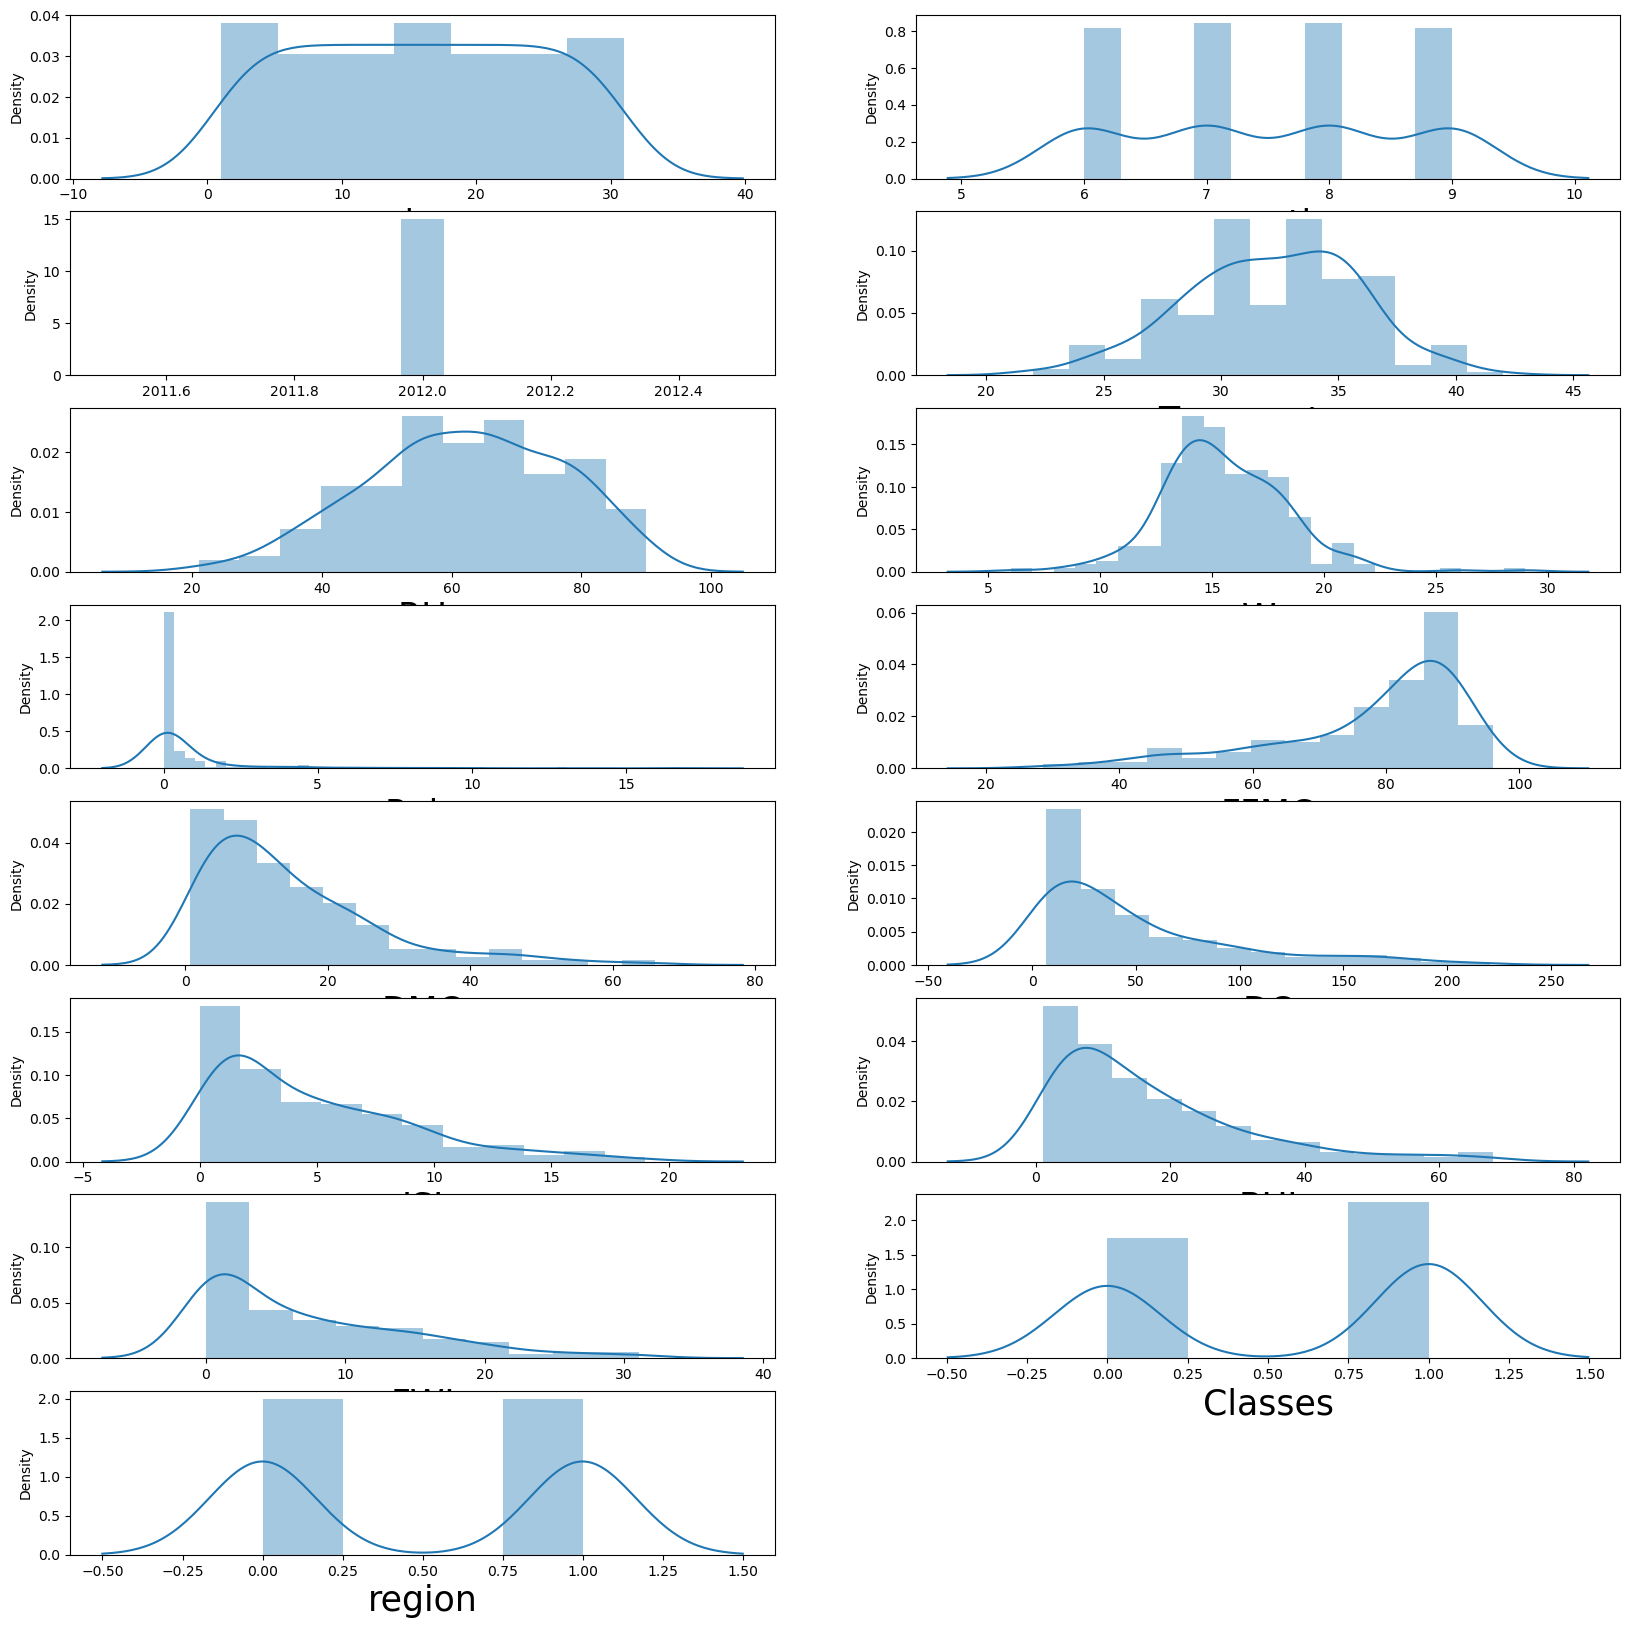

In [66]:
#checking the distribution of the features
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=15:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()



We can observe the Rain,DMC,DC,FWI,ISI,BUI are slightly right skewed(log normal distribution)

there is no variance in the year attribute

Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

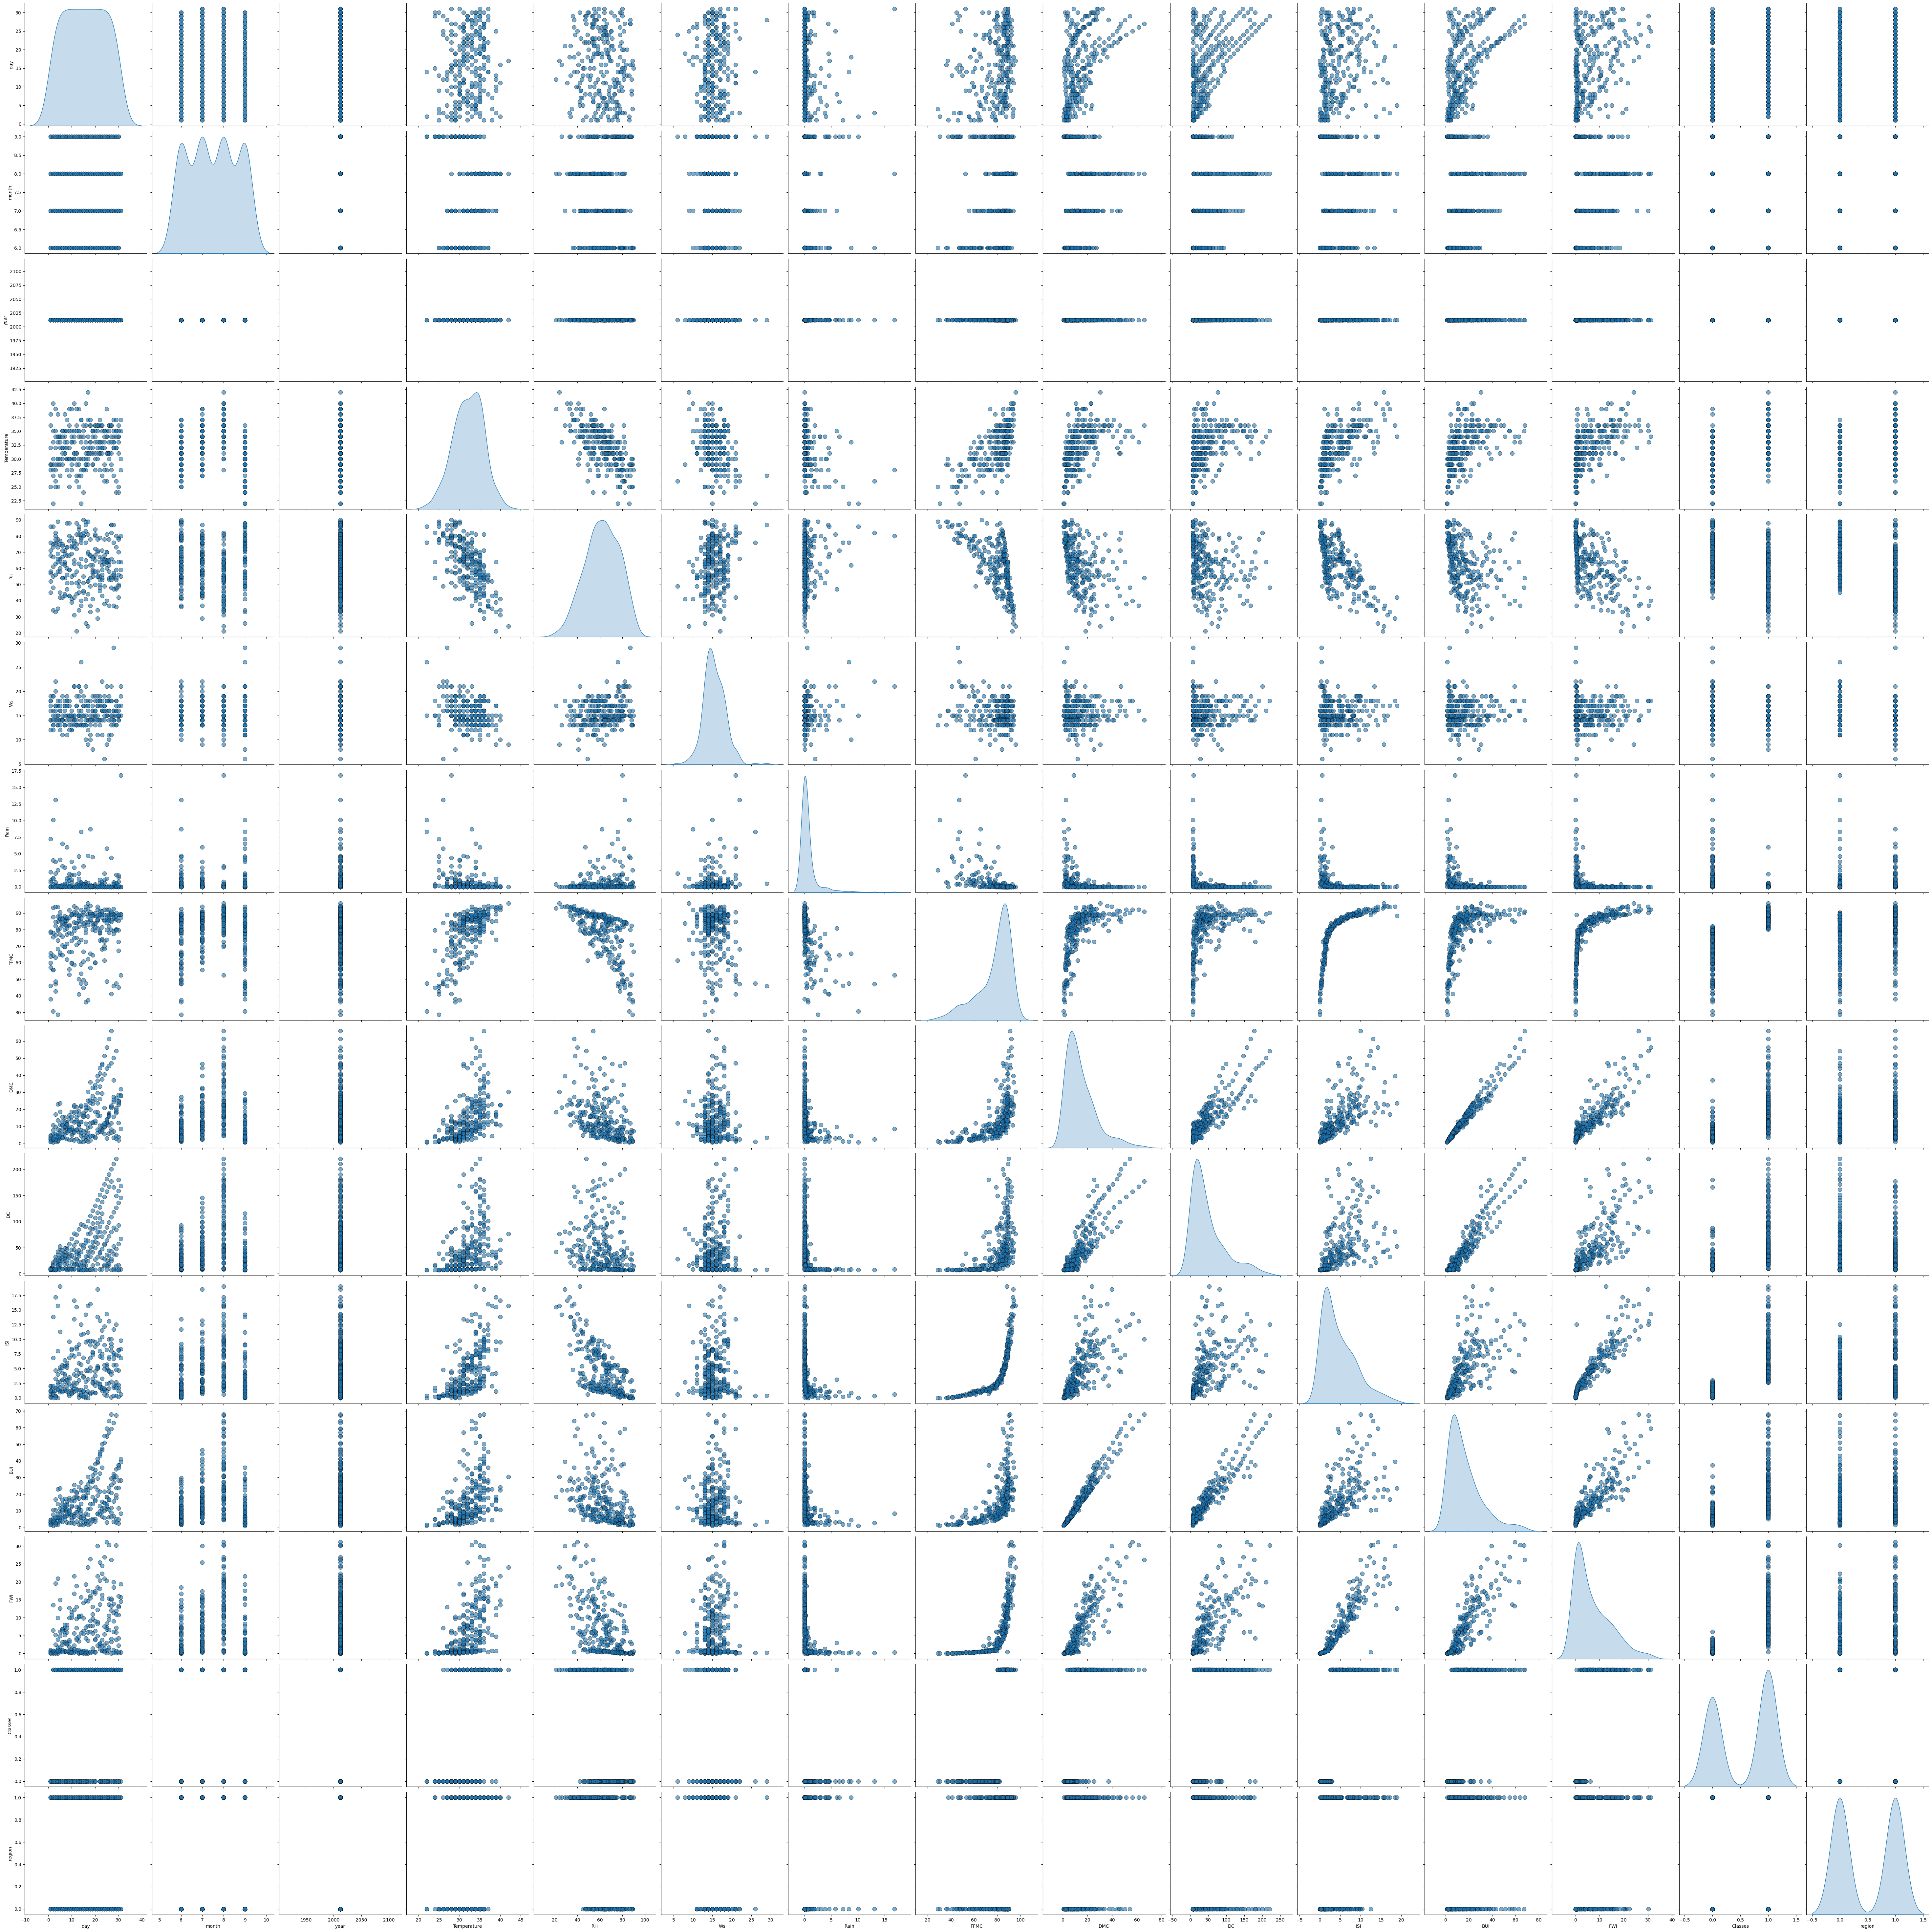

In [64]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis',fontsize =20,fontweight='bold',alpha=0.8)
sns.pairplot(data1,diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},height=4)

<AxesSubplot:>

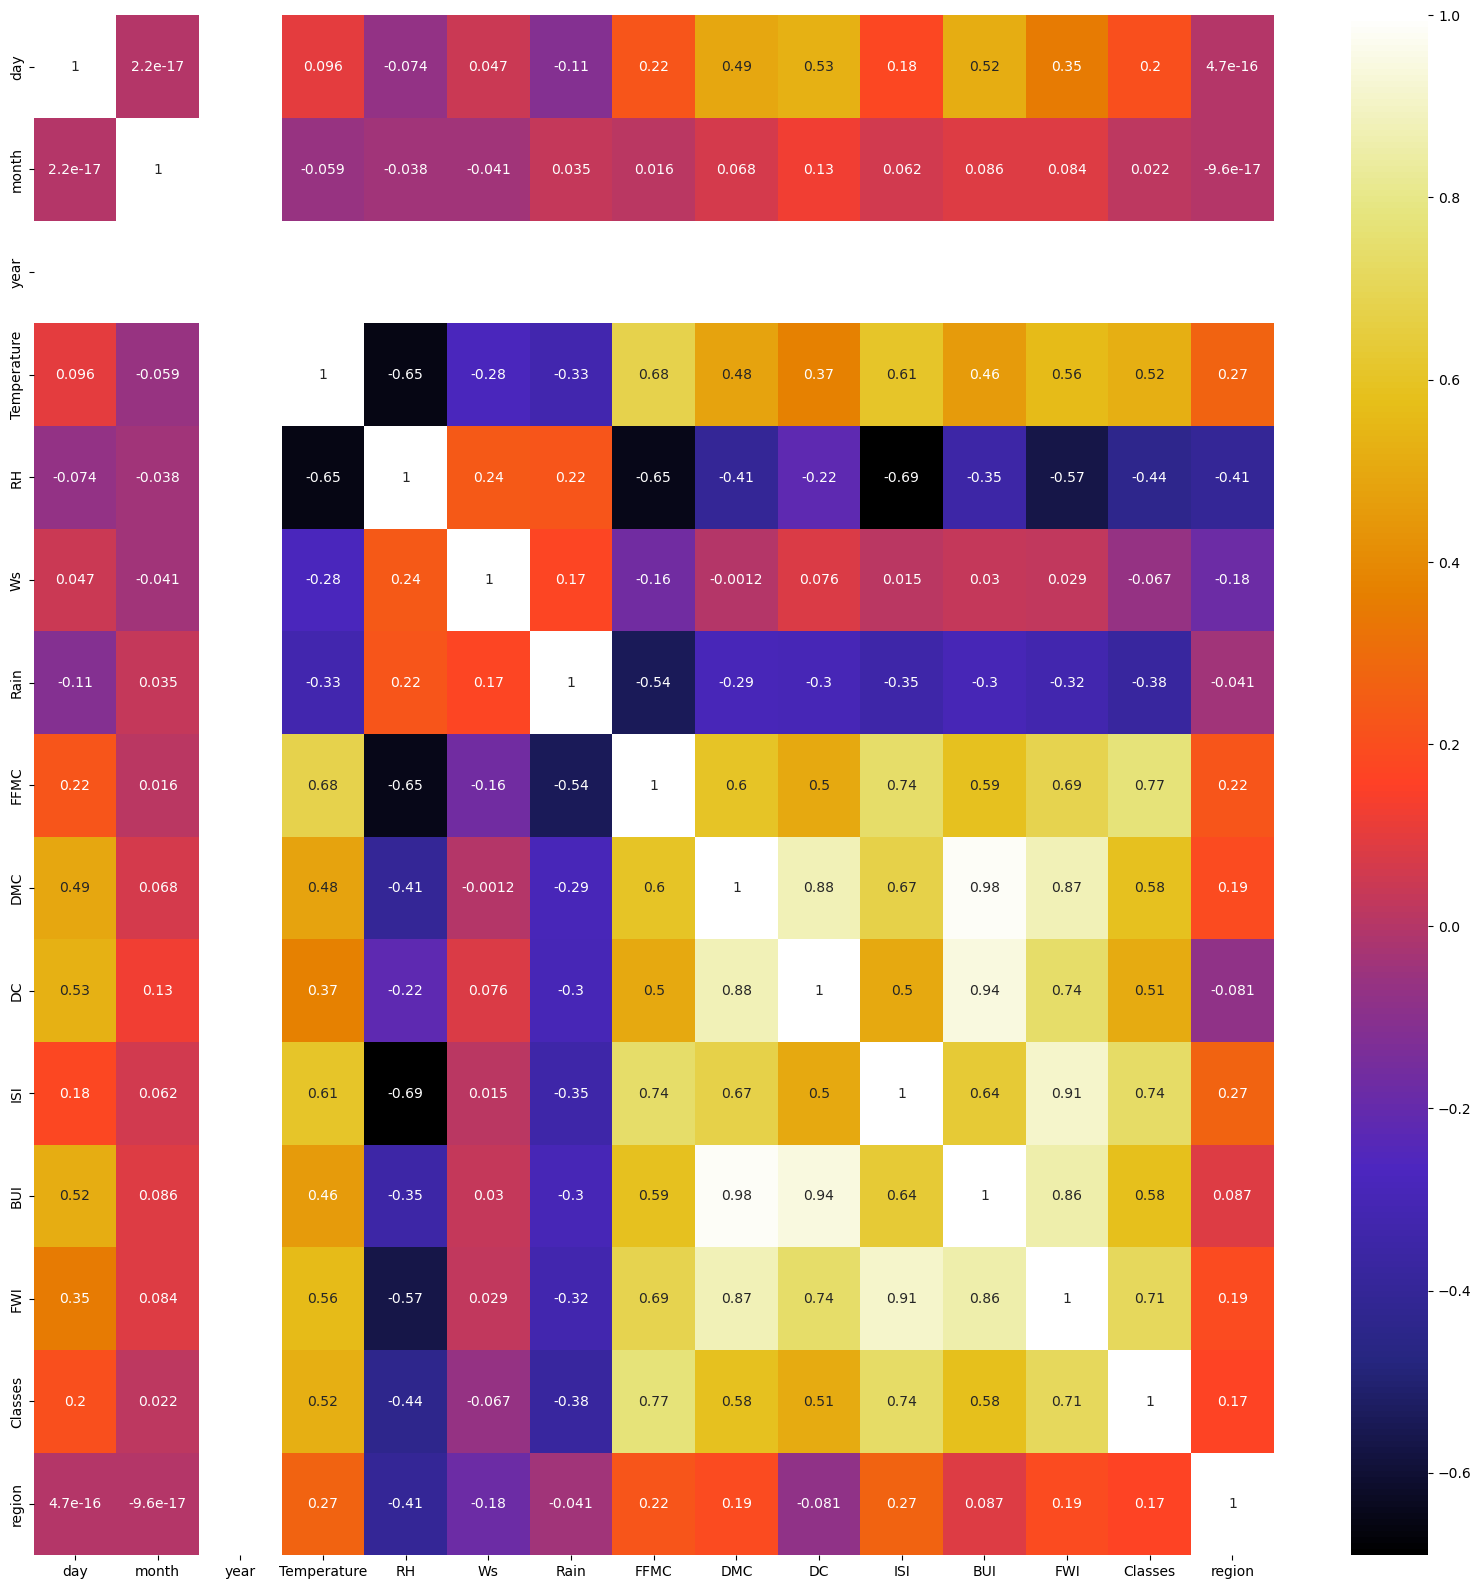

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),cmap='CMRmap',annot=True)

Visualizatio  of Target Feature

In [67]:
data1.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='region', ylabel='Classes'>

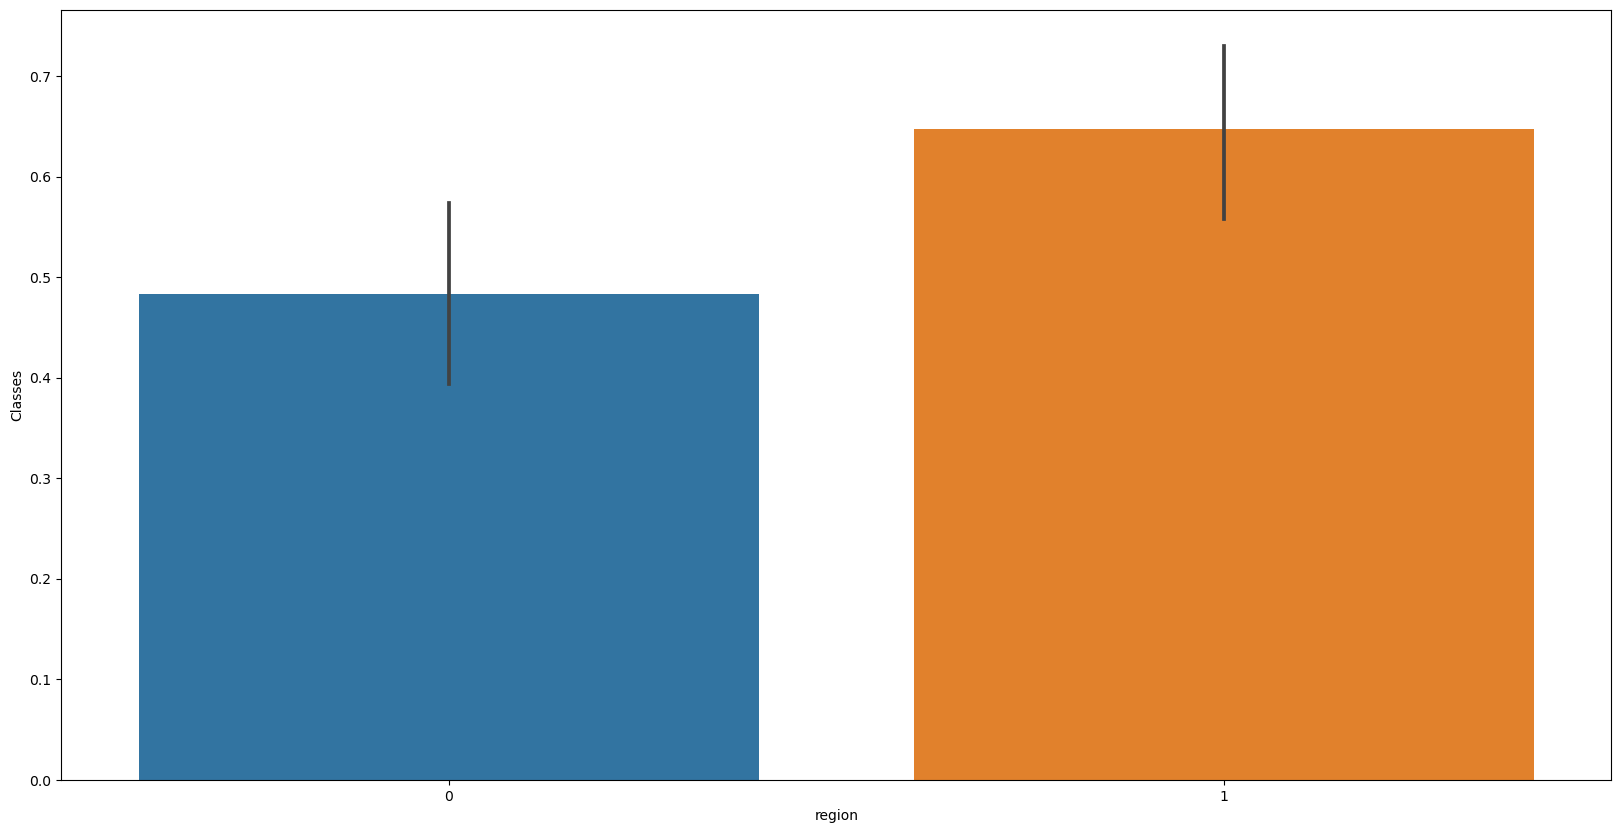

In [71]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='region',y='Classes',data=data1)

Observation 

We can see that Most of the fires happende in the Sisi-Bel-Abbes Region

Visualization Of Temparature Feature

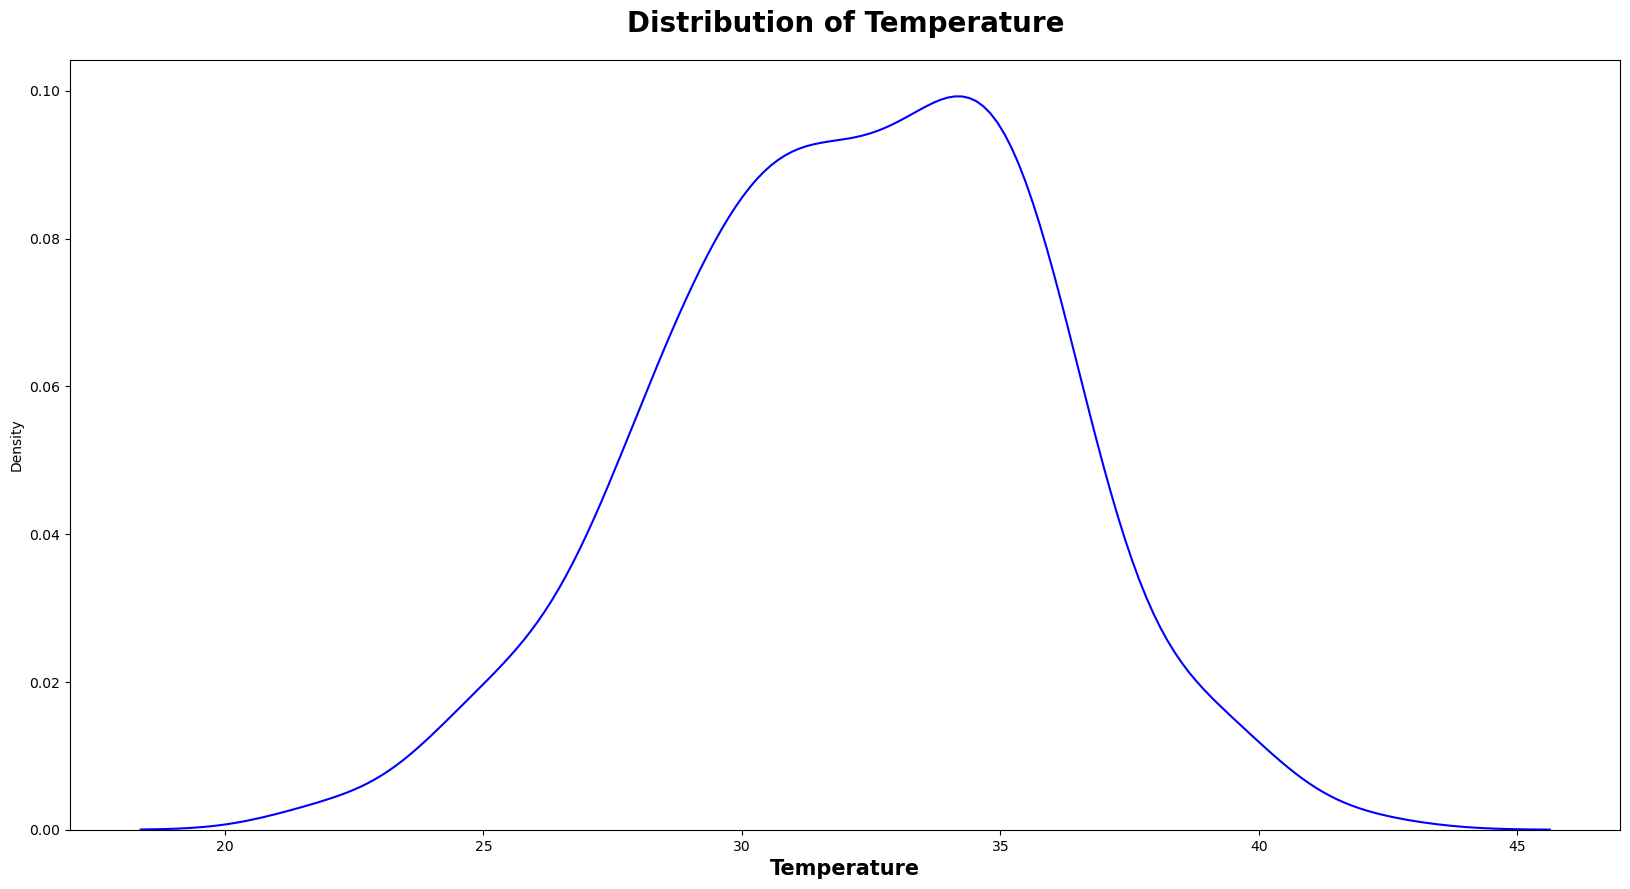

In [74]:
plt.subplots(figsize=(20,10))
sns.kdeplot(data=data1['Temperature'],color='b')
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.show()

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

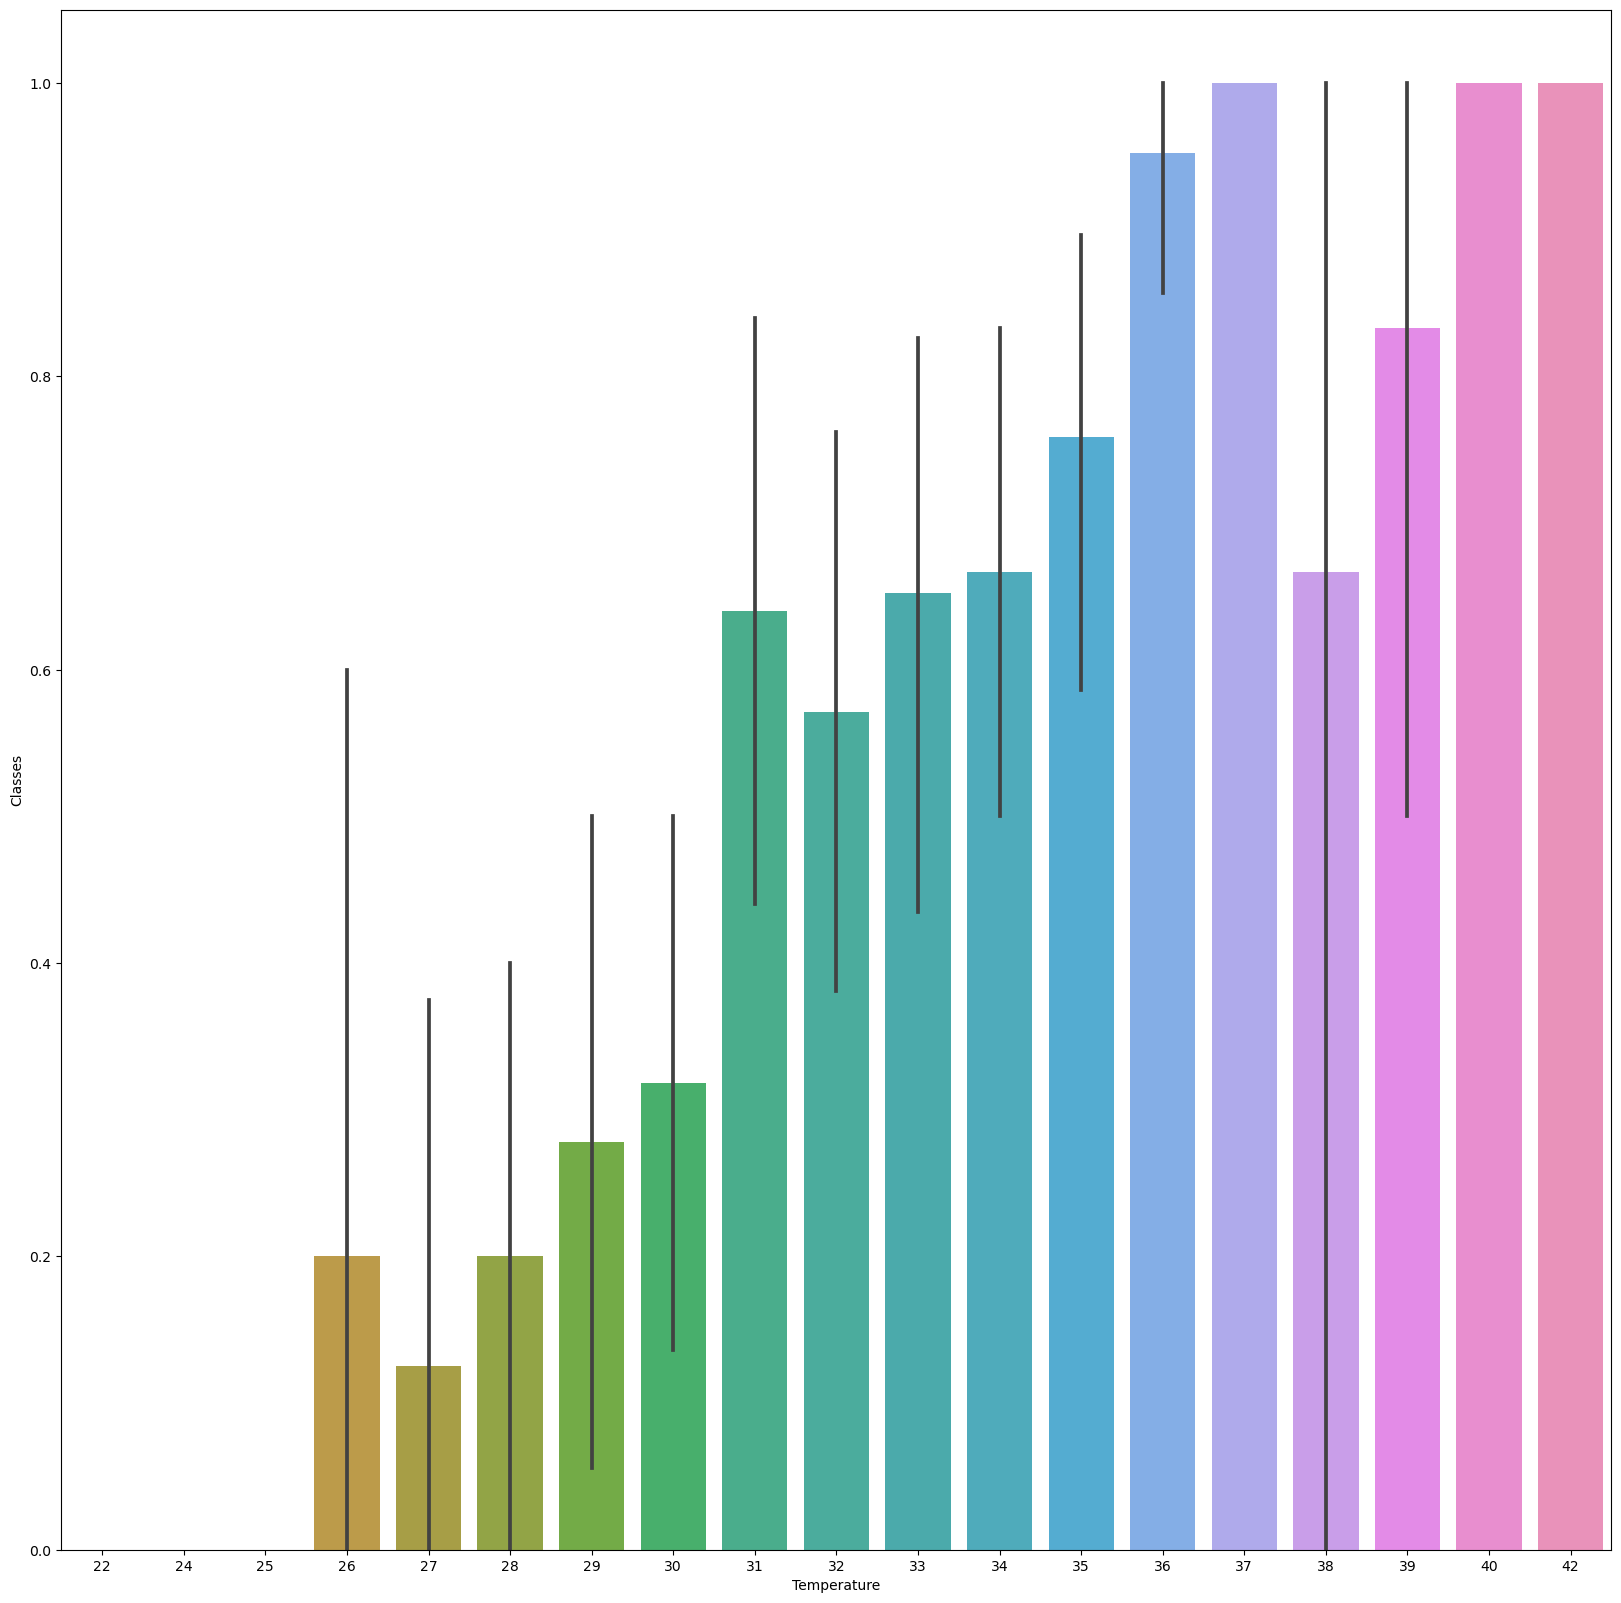

In [75]:
#checking highest Temperature
plt.rcParams['figure.figsize']=(20,20)
sns.barplot(x='Temperature',y='Classes',data=data1)

<AxesSubplot:xlabel='region', ylabel='Rain'>

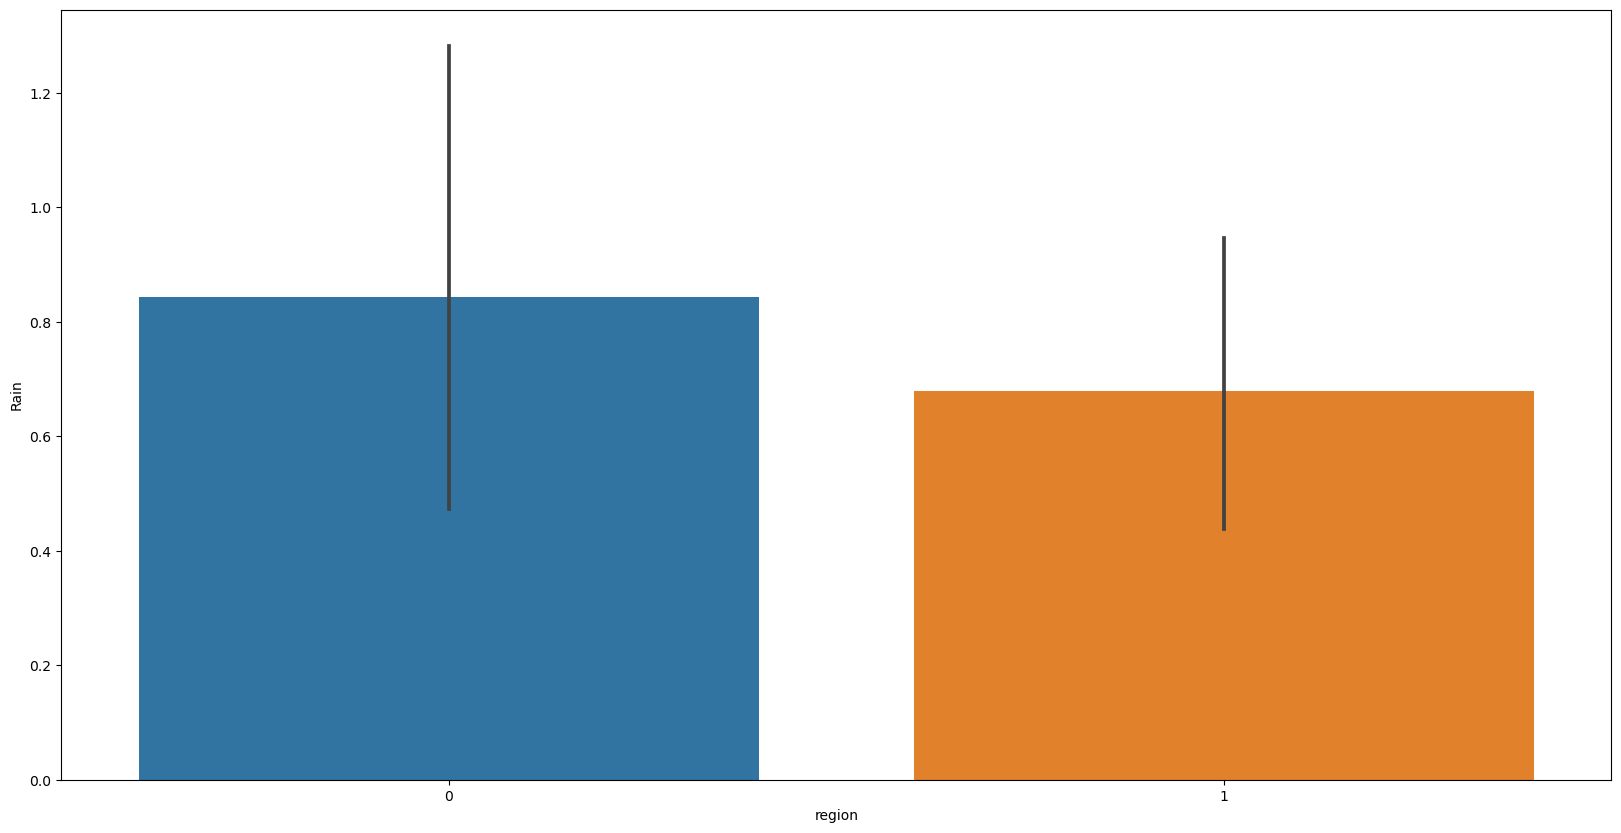

In [76]:
#checking for region most affected by rain
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='region', y='Rain',data=data1)

Beljaia is the most rainy region compared to Sidi-Bel-Abbes

<AxesSubplot:xlabel='region', ylabel='Temperature'>

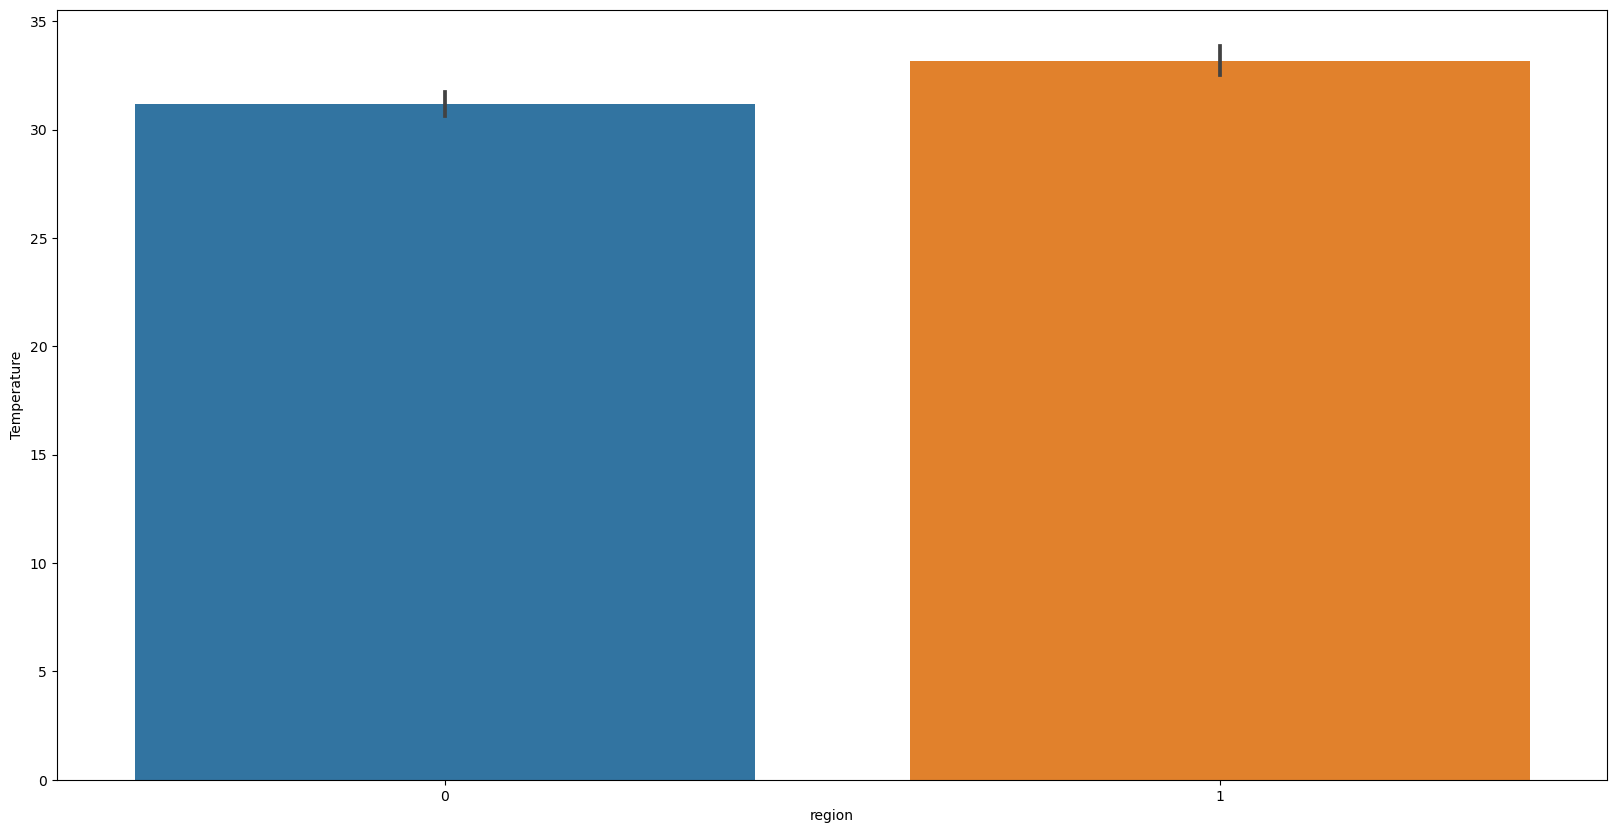

In [78]:
#checking forhigh tempreature regions
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='region',y="Temperature",data=data1)

Sidi-Bel-Abbes rcordeed the highest temeprature

Reg plot

In [85]:
num_col=[feature for feature in data1.columns if data1[feature].dtype!="O"]
num_col['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes','region']
plt.figure(figsize=(20,40))
for i in enumerate(num_col):
    plt.subplot(8,2,i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=data1, x=i[1],y='Classes')
    plt.xlabel('Classes')
    plt.title('{}vs Classes'.format(i[1]))

TypeError: list indices must be integers or slices, not tuple

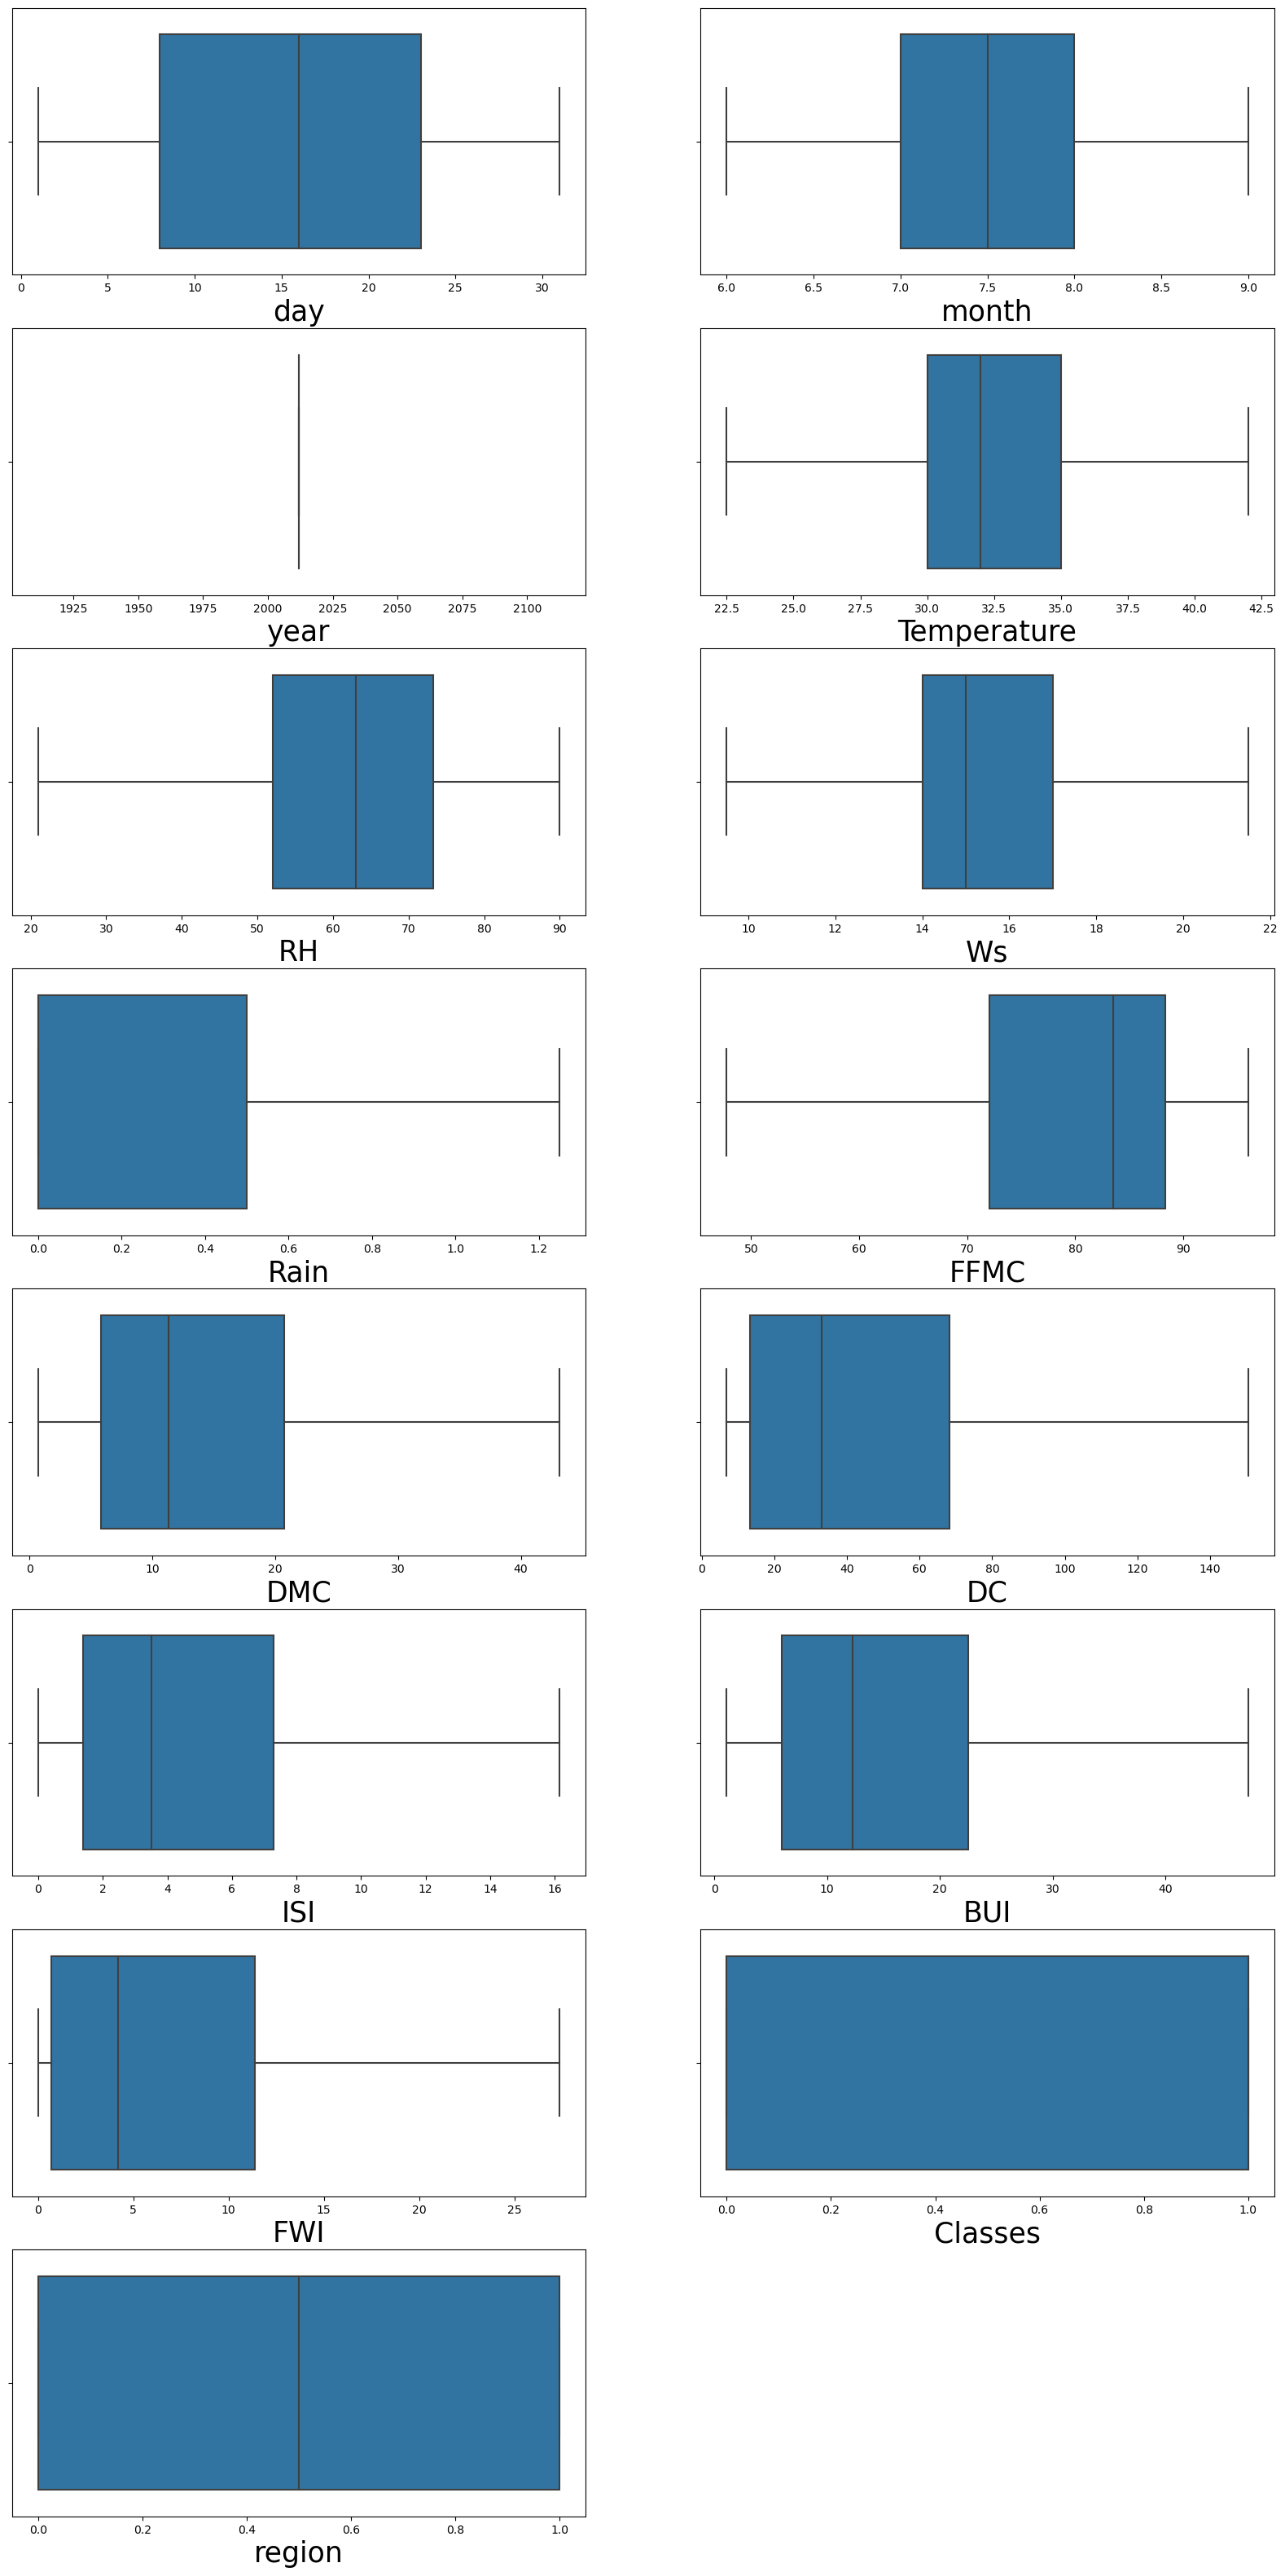

In [127]:
#check for outliers
plt.figure(figsize=(20,40),facecolor='white')
plotnumber =1

for column in data1:
    if plotnumber<=15:
        ax=plt.subplot(8,2,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

 we can observe the WS FFMC,DMC,BUI Rain feature have many outliers

In [125]:
## Dropping the outliers

def outliers_imputation_mild(data1,column):
    IQR=data1[column].quantile(0.75)-data1[column].quantile(0.25)
    lower_fence=data1[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data1[column].quantile(0.75)+(IQR*1.5)
    data1.loc[data1[column]<= lower_fence,column]=lower_fence
    data1.loc[data1[column]>= upper_fence,column]=upper_fence
    columns=data.columns
    
    
    print('IQR:',IQR)
    print(f'Lower Fence{column}:',lower_fence)
    print(f'Upper Fence{column}:',upper_fence)
    print("_____________________________________________________________")
    


columns=data1.columns
for col in columns:
    outliers_imputation_mild(data1,col)




IQR: 15.0
Lower Fenceday: -14.5
Upper Fenceday: 45.5
_____________________________________________________________
IQR: 1.0
Lower Fencemonth: 5.5
Upper Fencemonth: 9.5
_____________________________________________________________
IQR: 0.0
Lower Fenceyear: 2012.0
Upper Fenceyear: 2012.0
_____________________________________________________________
IQR: 5.0
Lower FenceTemperature: 22.5
Upper FenceTemperature: 42.5
_____________________________________________________________
IQR: 21.25
Lower FenceRH: 20.125
Upper FenceRH: 105.125
_____________________________________________________________
IQR: 3.0
Lower FenceWs: 9.5
Upper FenceWs: 21.5
_____________________________________________________________
IQR: 0.5
Lower FenceRain: -0.75
Upper FenceRain: 1.25
_____________________________________________________________
IQR: 16.224999999999994
Lower FenceFFMC: 47.73750000000001
Upper FenceFFMC: 112.63749999999999
_____________________________________________________________
IQR: 14.95
Lower Fenc

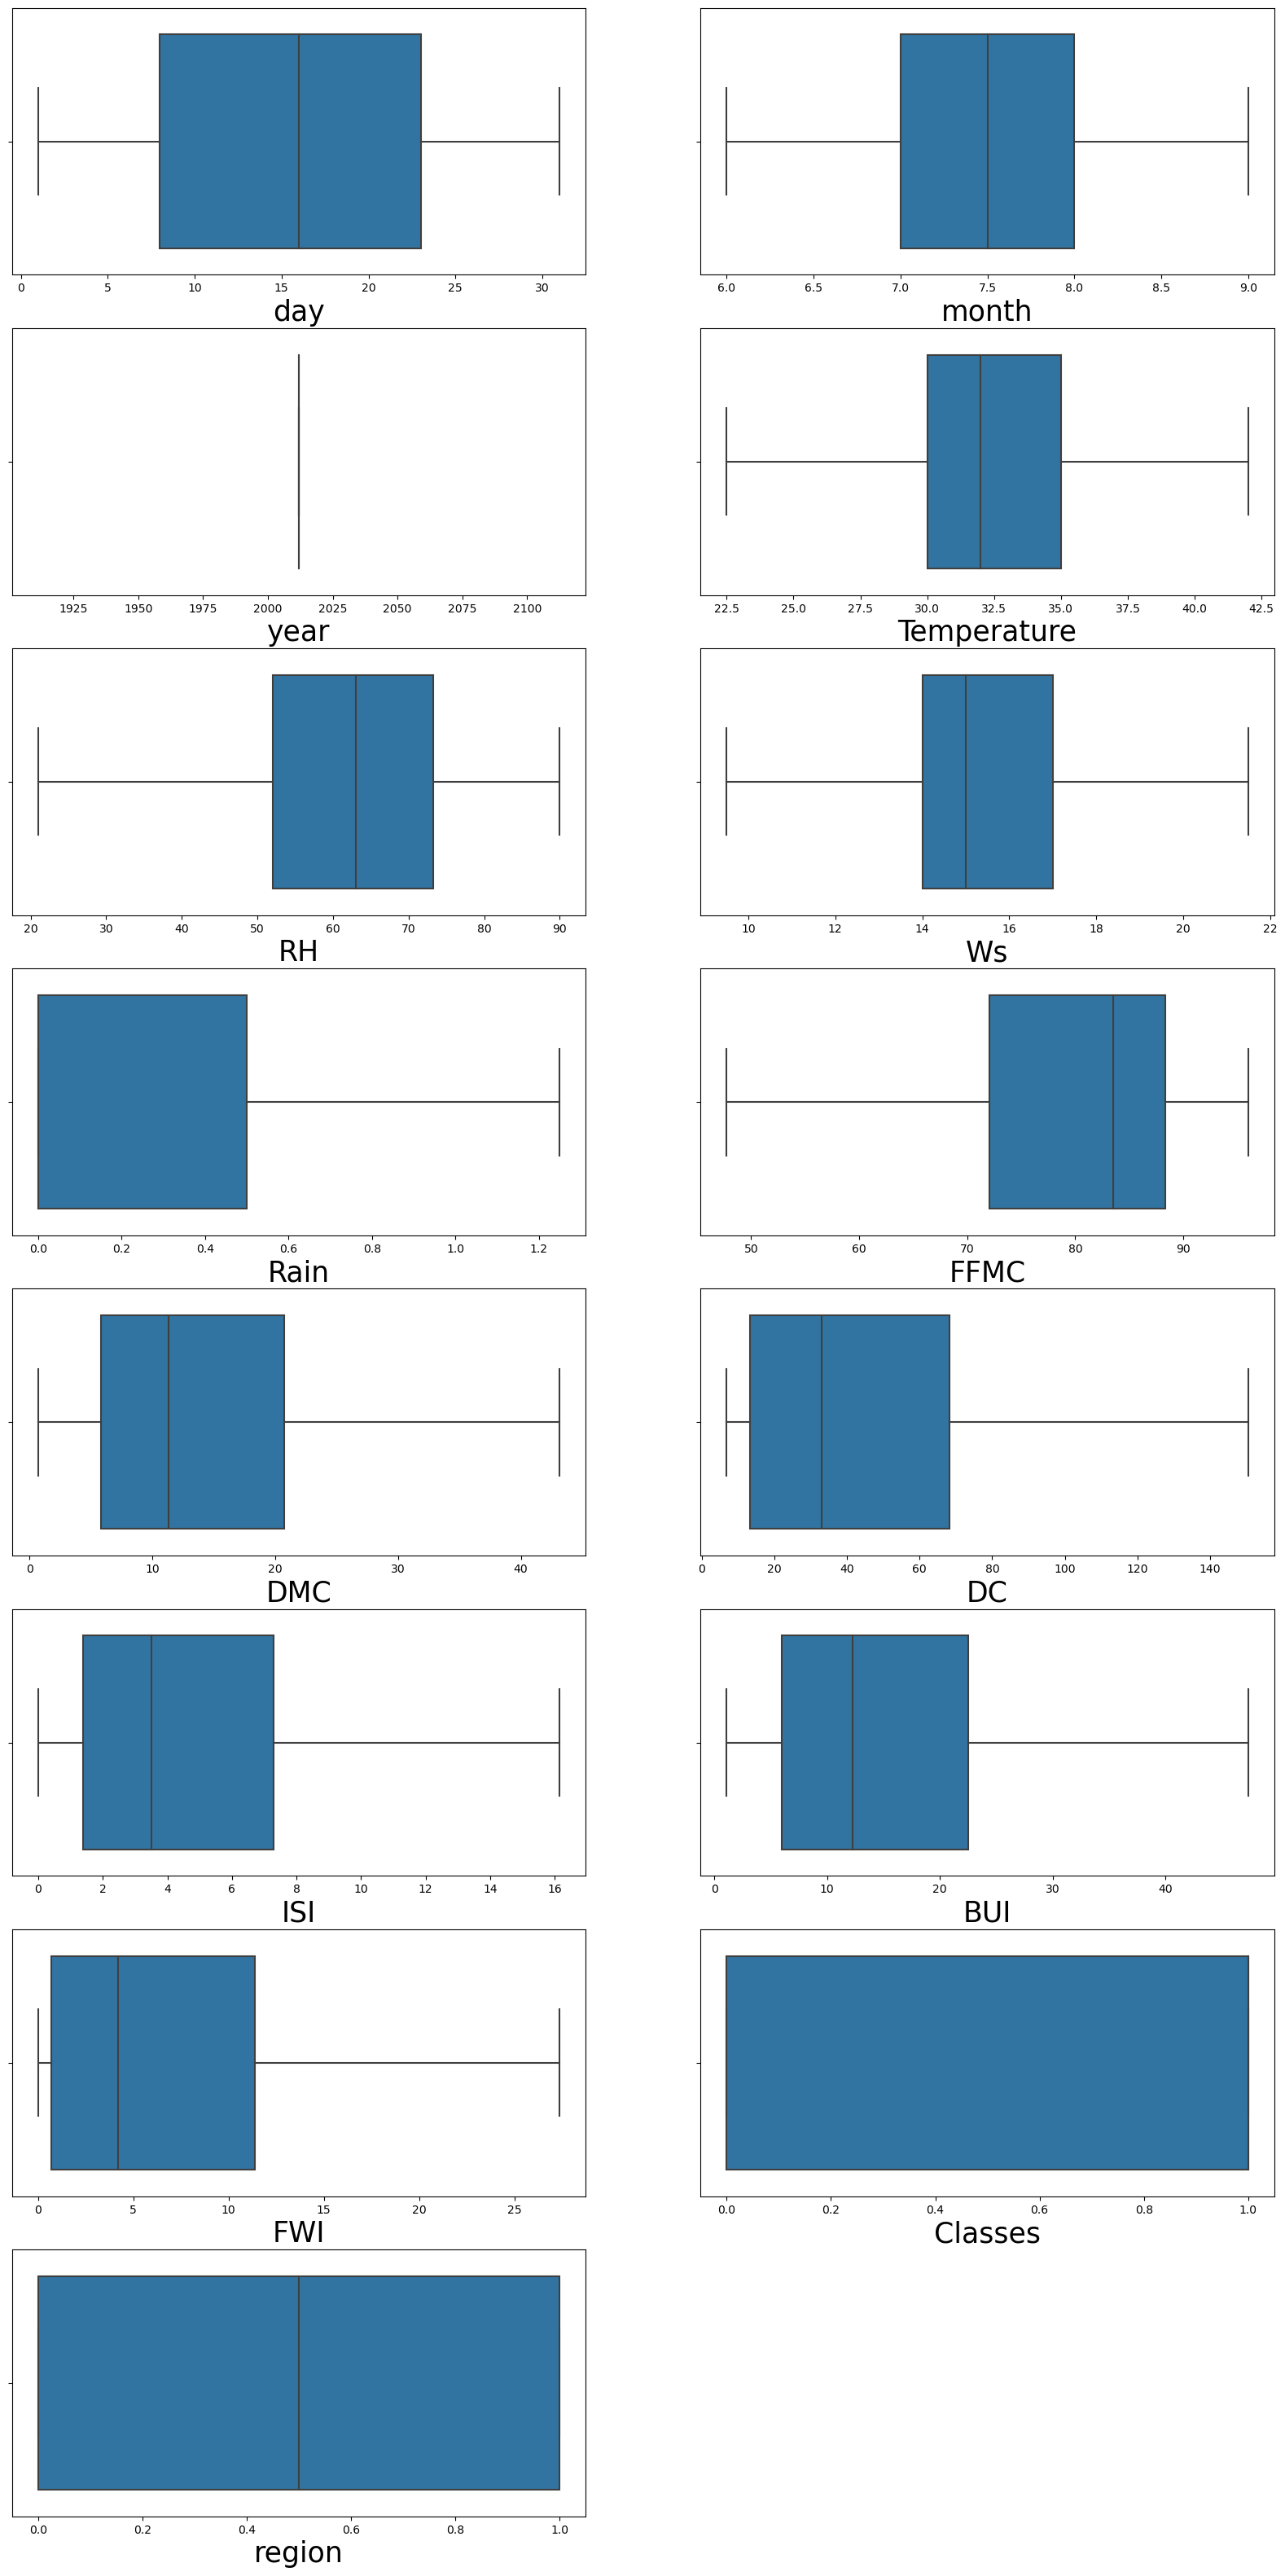

In [128]:
#rechecking the outliers after dropping the outliers
plt.figure(figsize=(20,40),facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=15:
        ax=plt.subplot(8,2,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()


we can see no outliers in any of the features

In [131]:
#Creating independent and dependent features
x=data1.drop(columns=['Classes'])
y=data1['Classes']

In [132]:
x

day  month  year  Temperature    RH    Ws  Rain     FFMC   DMC    DC  \
0     1.0    6.0  2012         29.0  57.0  18.0  0.00  65.7000   3.4   7.6   
1     2.0    6.0  2012         29.0  61.0  13.0  1.25  64.4000   4.1   7.6   
2     3.0    6.0  2012         26.0  82.0  21.5  1.25  47.7375   2.5   7.1   
3     4.0    6.0  2012         25.0  89.0  13.0  1.25  47.7375   1.3   6.9   
4     5.0    6.0  2012         27.0  77.0  16.0  0.00  64.8000   3.0  14.2   
..    ...    ...   ...          ...   ...   ...   ...      ...   ...   ...   
239  26.0    9.0  2012         30.0  65.0  14.0  0.00  85.4000  16.0  44.5   
240  27.0    9.0  2012         28.0  87.0  15.0  1.25  47.7375   6.5   8.0   
241  28.0    9.0  2012         27.0  87.0  21.5  0.50  47.7375   3.5   7.9   
242  29.0    9.0  2012         24.0  54.0  18.0  0.10  79.7000   4.3  15.2   
243  30.0    9.0  2012         24.0  64.0  15.0  0.20  67.3000   3.8  16.5   

     ISI   BUI  FWI  region  
0    1.3   3.4  0.5     0.0  
1    1.0   3.9  0.4     0.0  
2    0.3   2.7  0.1     0.0  
3    0.0   1.7  0.0     0.0  
4    1.2   3.9  0.5     0.0  
..   ...   ...  ...     ...  
239  4.5  16.9  6.5     1.0  
240  0.1   6.2  0.0     1.0  
241  0.4   3.4  0.2     1.0  
242  1.7   5.1  0.7     1.0  
243  1.2   4.8  0.5     1.0  

[244 rows x 14 columns]

In [133]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

KeyError: 'Classes'

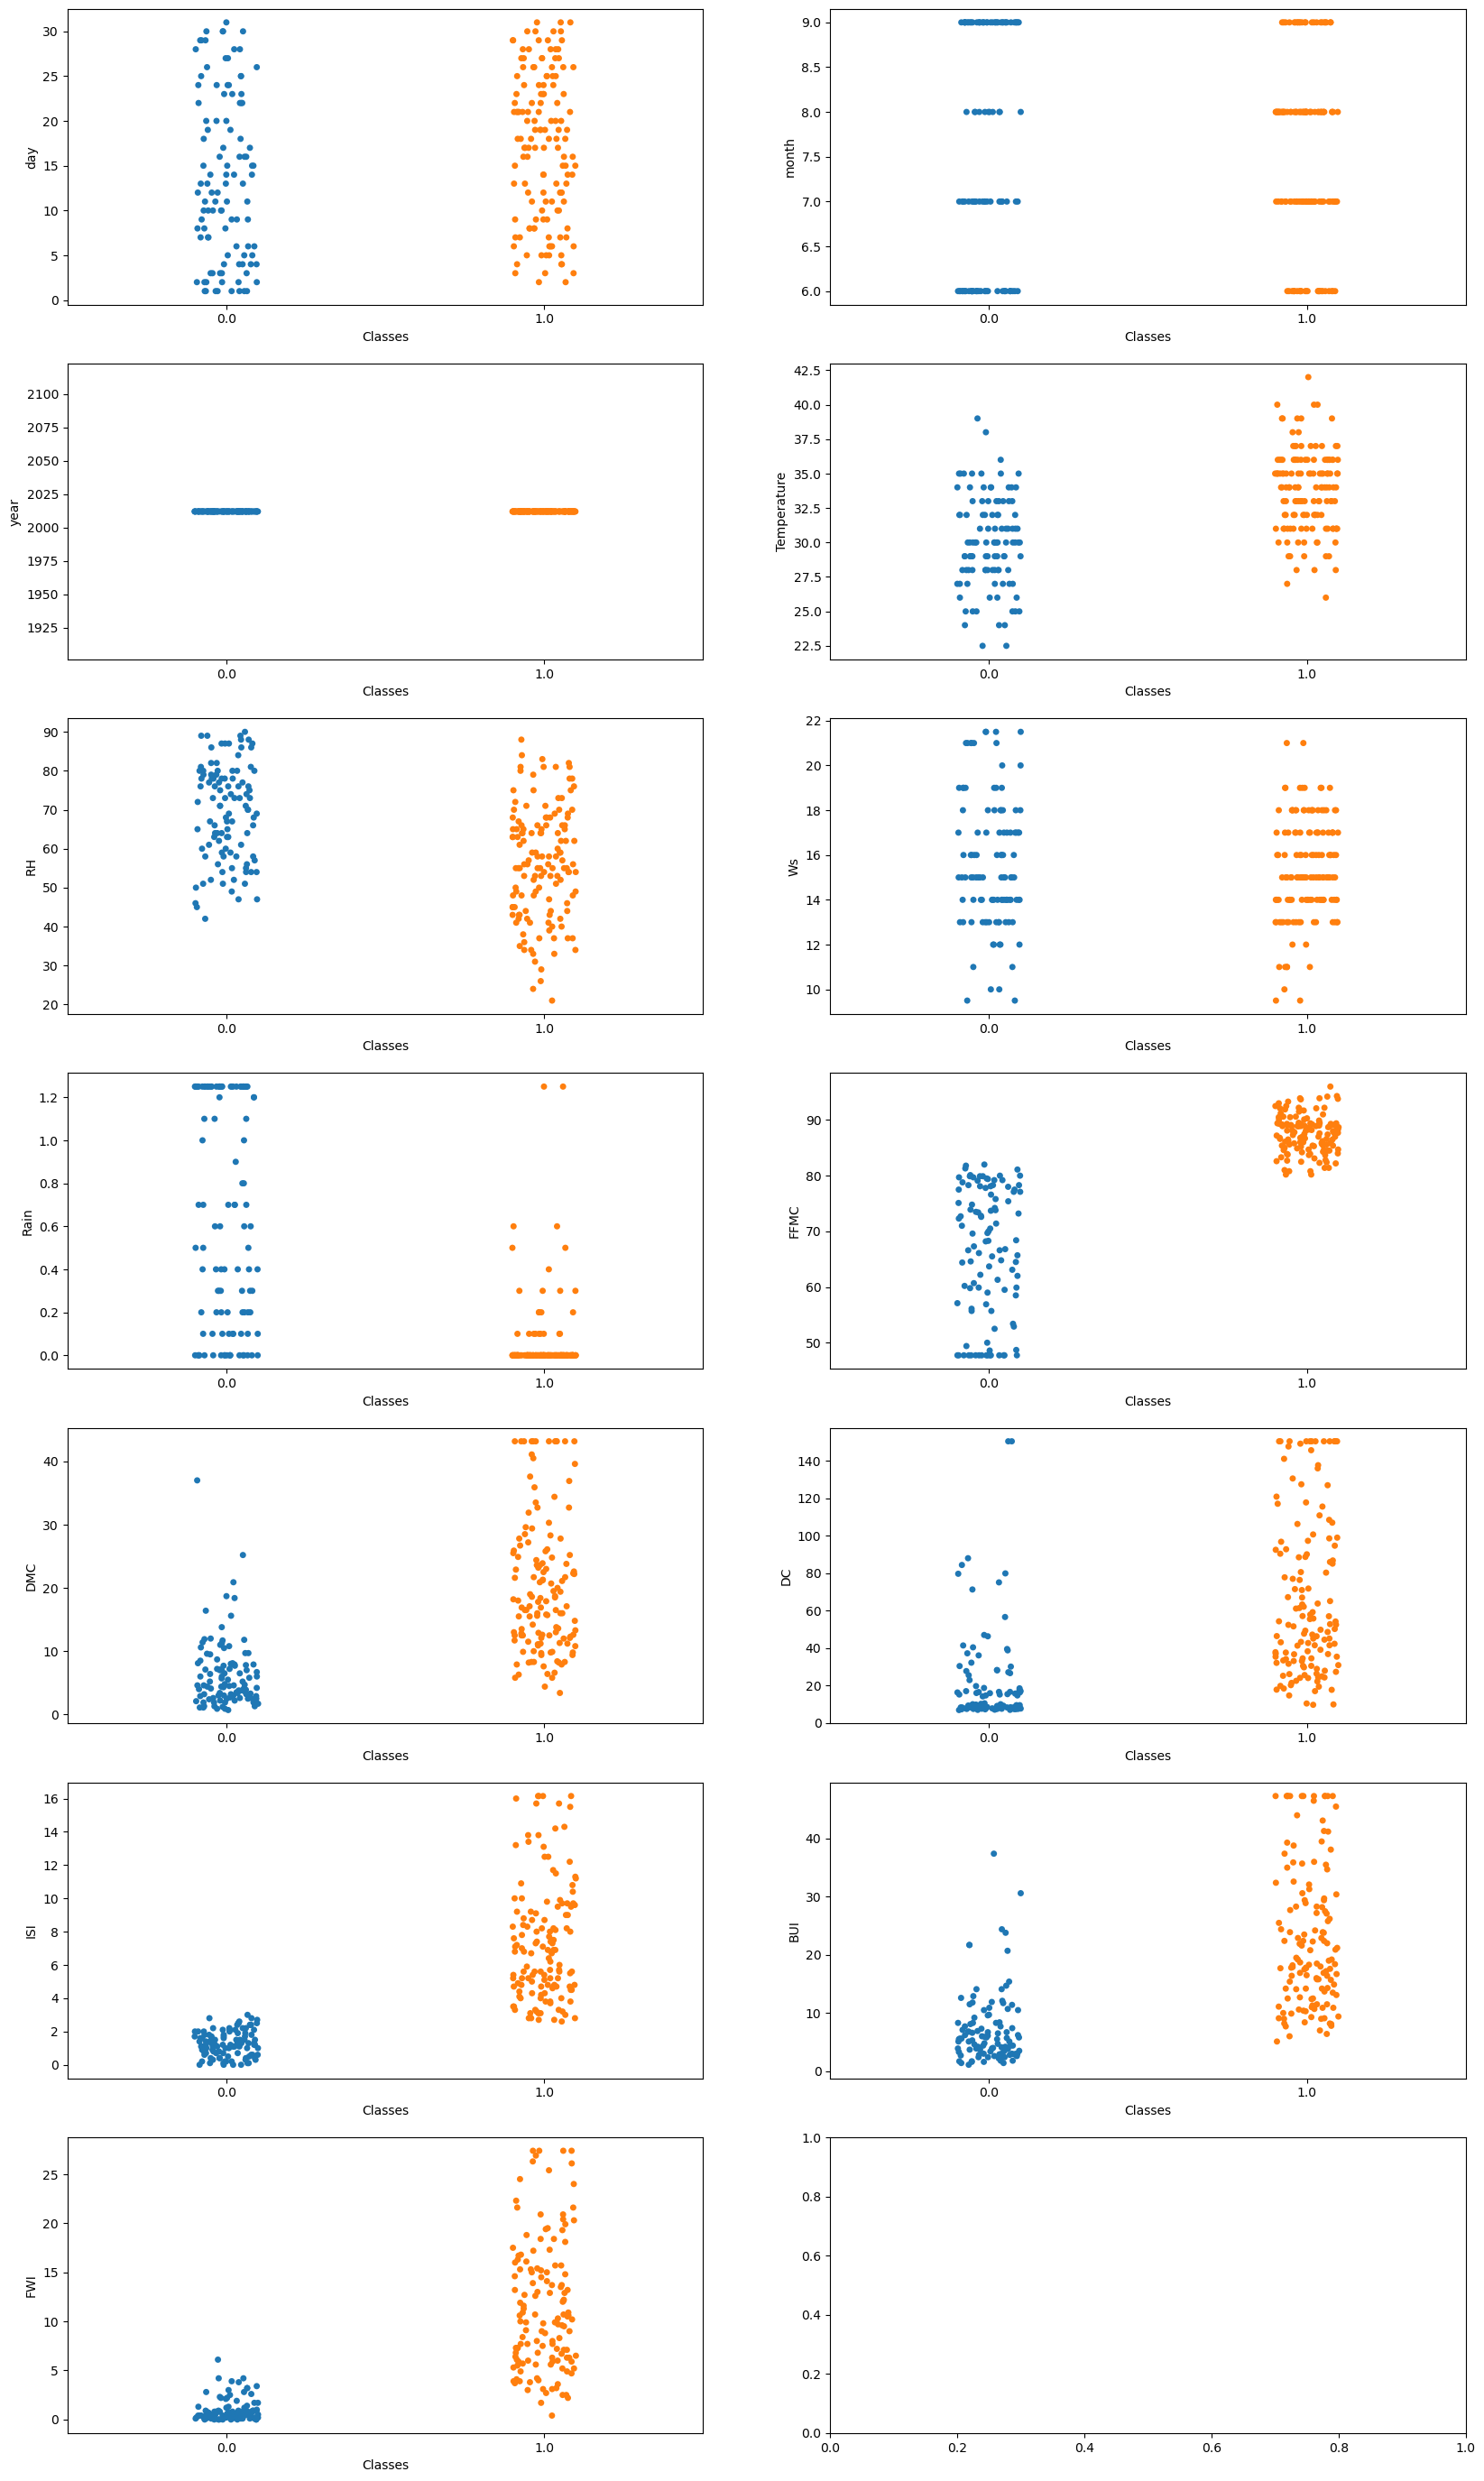

In [134]:
# visualising the relation between independent and dependent features
plt.figure(figsize=(20,40),facecolor='white')
plotnumber= 1

for column in data1:
    if plotnumber<=15:
        ax=plt.subplot(8,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

# importing libraries for ML



In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


In [138]:
#tarin-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)

In [139]:
x_train.head()

day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC     DC  \
40   11.0    7.0  2012         33.0  76.0  14.0   0.0  81.1   8.1   18.7   
52   23.0    7.0  2012         27.0  66.0  21.5   0.4  68.2  10.5   71.3   
172  21.0    7.0  2012         36.0  29.0  18.0   0.0  93.9  39.6   80.6   
77   17.0    8.0  2012         37.0  52.0  18.0   0.0  89.3  16.0  100.7   
10   11.0    6.0  2012         31.0  65.0  14.0   0.0  84.5  12.5   54.3   

       ISI   BUI      FWI  region  
40    2.60   8.1   2.2000     0.0  
52    1.80  15.4   2.1000     0.0  
172  16.15  39.5  27.3875     1.0  
77    9.70  22.9  14.6000     0.0  
10    4.00  15.8   5.6000     0.0

In [140]:
x_train.shape,y_train.shape

((158, 14), (158,))

In [142]:
#standardization of the features
scaler=StandardScaler()
scaler

StandardScaler()

In [143]:
# Using fit_transform to Standardize the train data
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.51184492, -0.50068677,  0.        , ..., -0.58165704,
        -0.59669041, -0.85805812],
       [ 0.8646912 , -0.50068677,  0.        , ..., -0.02830565,
        -0.61059431, -0.85805812],
       [ 0.63526852, -0.50068677,  0.        , ...,  1.79851198,
         2.90535267,  1.16542222],
       ...,
       [-0.85597895, -1.40997999,  0.        , ..., -0.17232861,
         0.08460035, -0.85805812],
       [-1.08540164,  1.31789967,  0.        , ..., -0.93034423,
        -0.84696049,  1.16542222],
       [-0.62655626,  0.40860645,  0.        , ...,  0.4644045 ,
         0.71027554, -0.85805812]])

In [144]:
x_test=scaler.transform(x_test)
x_test

array([[ 1.66767061, -1.40997999,  0.        , ...,  0.94953449,
         0.89102615, -0.85805812],
       [ 1.09411389, -1.40997999,  0.        , ..., -0.23296986,
         0.02898478,  1.16542222],
       [-0.05299954,  0.40860645,  0.        , ...,  0.47198466,
        -0.0266308 , -0.85805812],
       ...,
       [ 0.97940255,  1.31789967,  0.        , ..., -0.29361111,
        -0.84696049,  1.16542222],
       [ 0.0617118 ,  0.40860645,  0.        , ...,  0.63874809,
         1.15520012,  1.16542222],
       [ 0.97940255, -0.50068677,  0.        , ...,  0.44924419,
        -0.55497874,  1.16542222]])

In [145]:
#creating Logistic Regression Model
Lreg=LogisticRegression()
Lreg

LogisticRegression()

In [146]:
#Passing independent and dependent trainig data to the model
Lreg.fit(x_train,y_train)



LogisticRegression()

In [147]:
#using the model for prediction of test data
Lreg_pred=Lreg.predict(x_test)
Lreg_pred

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0.])

# Performance metrics


In [148]:
##Confusion Matrics
con_mat=confusion_matrix(y_test,Lreg_pred)
con_mat

array([[28,  1],
       [ 3, 54]], dtype=int64)

In [158]:
truly_positive=con_mat[0][0]
falsely_positive=con_mat[0][1]
falsely_negative=con_mat[1][0]
truly_negative=con_mat[1][1]

In [159]:
## Accuracy Score
accuracy = round(accuracy_score(y_test,Lreg_pred),4)
accuracy

0.9535

In [160]:
#Precision
precision=round(truly_positive/(truly_positive+falsely_positive),4)
precision

0.9655

In [161]:
#Recall
recall = round(truly_positive/(truly_positive+falsely_negative),4)
recall

0.9032

In [163]:
# F-1 Score
f1_score=2*(precision*recall)/(precision+recall)
f1_score

0.9333114999732435

In [165]:
#Classification Report
print(classification_report(y_test,Lreg_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        29
         1.0       0.98      0.95      0.96        57

    accuracy                           0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



In [167]:
#Area under curve
auc=roc_auc_score(y_test,Lreg_pred)
auc

0.9564428312159708

In [171]:
#ROC
fpr,tpr,thresholds=roc_curve(y_test,Lreg_pred)

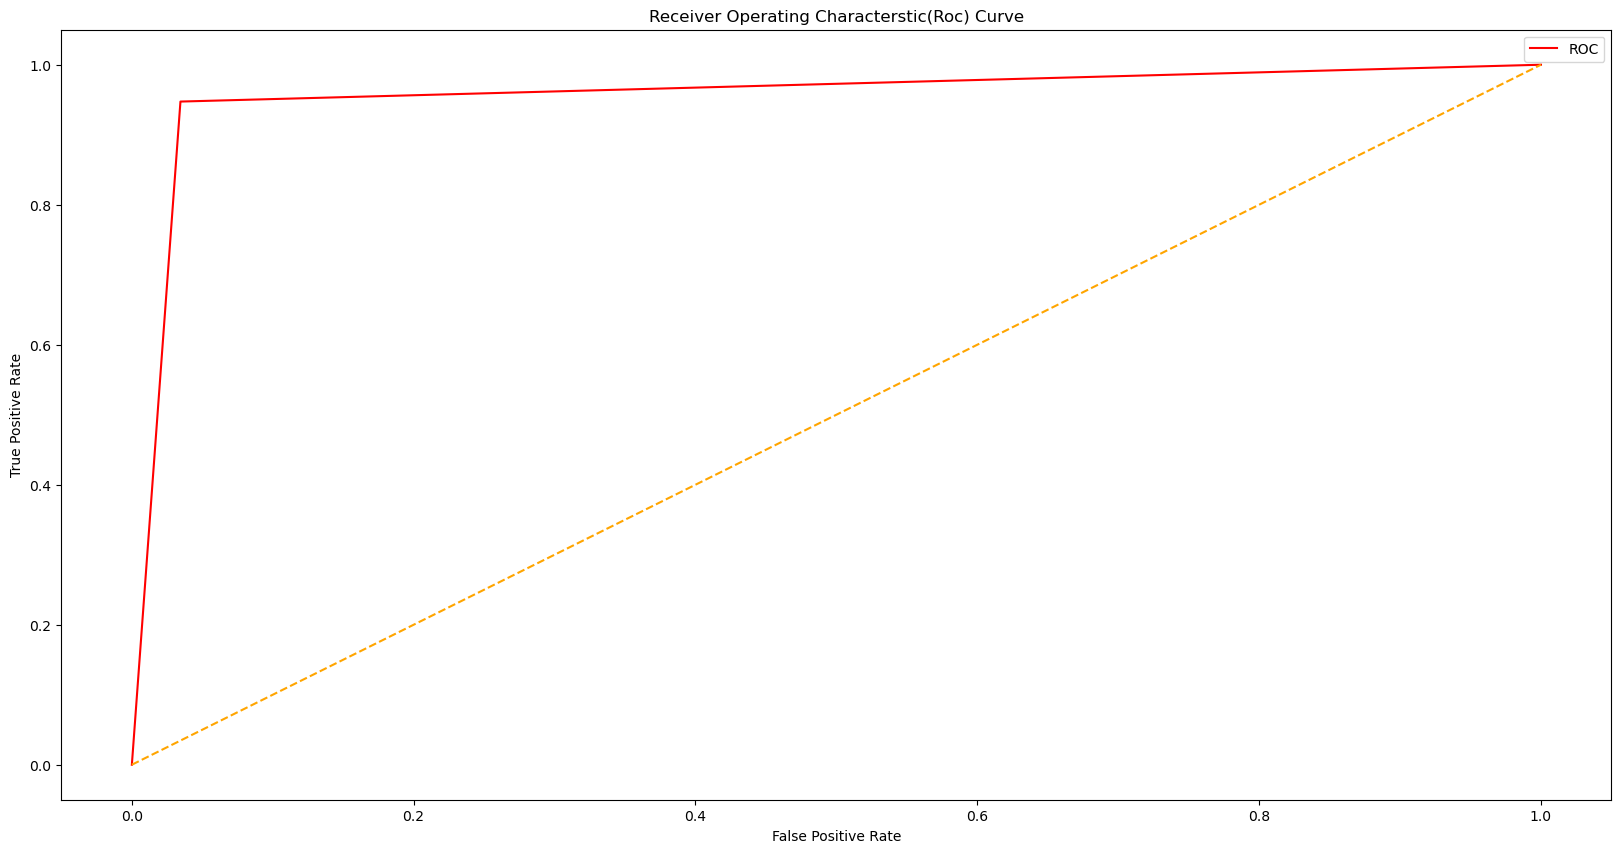

In [172]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color ='orange',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstic(Roc) Curve")
plt.legend()
plt.show()